In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Carregar dataset já ingerido do notebook 00 ou 01
df = pd.read_csv("../data/internet_adoption_clean_final.csv")

print("Dataset carregado:", df.shape)
df.head()

Dataset carregado: (6344, 30)


,Country,Date,Population,Internet_Penetration (%),Broadband_Speed (Mbps),Mobile_Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Attainment_Index (%),Mobile_Data_Usage (GB per User),Digital_Investment (M USD),...,E_Commerce_Penetration (%),Government_Digital_Policy_Index (%),Network_Latency (ms),Cloud_Service_Adoption (%),IoT_Device_Density (per 1000 people),AI_Adoption_Index (%),Data_Privacy_Regulation_Strength (%),Energy_Consumption_for_Connectivity (kWh),Year,Month
0,Algeria,2015-01-01,25258314,37.436774,46.839032,8.533871,5327.303548,45.489677,2.167742,164.128065,...,33.408387,37.136774,77.050645,27.834194,22.950645,15.652581,27.985161,248.871935,2015,1
1,Algeria,2015-02-01,25258314,37.484286,47.227500,8.687500,5331.729286,45.555714,2.185357,165.386071,...,33.520000,37.128214,77.045000,27.856429,22.936429,15.681429,27.989643,248.757500,2015,2
2,Algeria,2015-03-01,25258314,37.629677,47.436129,8.852903,5342.169032,45.608710,2.182581,166.200645,...,33.545806,37.155806,77.120968,27.870968,23.034839,15.686452,27.993548,248.524839,2015,3
3,Algeria,2015-04-01,25258314,37.257667,47.500000,9.058333,5354.909667,45.643333,2.199000,166.618667,...,33.579333,37.120000,77.255333,27.880333,23.083667,15.706667,28.010000,248.497333,2015,4
4,Algeria,2015-05-01,25258314,37.492258,47.659677,8.886452,5360.973226,45.662258,2.205484,167.409032,...,33.598710,37.155484,77.075161,27.930323,23.111290,15.729355,28.018065,248.983548,2015,5


In [9]:
# remover espaços do nome das colunas
df.columns = df.columns.str.strip()

# remover duplicatas se existirem
df = df.drop_duplicates()

# checar valores ausentes
df.isna().sum()

Country                                      0
Date                                         0
Population                                   0
Internet_Penetration (%)                     0
Broadband_Speed (Mbps)                       0
Mobile_Broadband_Speed (Mbps)                0
GDP_Per_Capita (USD)                         0
Education_Attainment_Index (%)               0
Mobile_Data_Usage (GB per User)              0
Digital_Investment (M USD)                   0
Digital_Literacy_Score (%)                   0
Sentiment_Score (Social Media)               0
5G_Rollout_Status                            0
Urban_Population_Split (%)                   0
Rural_Population_Split (%)                   0
Latitude                                     0
Longitude                                    0
Internet_Access_Cost (USD per Mbps)          0
Device_Penetration (%)                       0
Cybersecurity_Incidents (Count)              0
E_Commerce_Penetration (%)                   0
Government_Di

In [10]:
# Preencher numéricos com mediana
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Preencher categóricos com moda
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [11]:
df["Total_Speed_Index"] = (
    df["Broadband_Speed (Mbps)"] * 0.6 +
    df["Mobile_Broadband_Speed (Mbps)"] * 0.4
)

df["Digital_Inclusion_Index"] = (
    df["Internet_Penetration (%)"] * 0.5 +
    df["Digital_Literacy_Score (%)"] * 0.3 +
    df["Device_Penetration (%)"] * 0.2
)

df["Relative_Internet_Cost"] = (
    df["Internet_Access_Cost (USD per Mbps)"] /
    df["GDP_Per_Capita (USD)"]
)

df["Log_GDP"] = np.log1p(df["GDP_Per_Capita (USD)"])
df["Log_Internet_Cost"] = np.log1p(df["Internet_Access_Cost (USD per Mbps)"])

df["Urban_Rural_Ratio"] = (
    df["Urban_Population_Split (%)"] /
    df["Rural_Population_Split (%)"]
)


In [12]:
# 5G_Rollout_Status → one-hot
df = pd.get_dummies(df, columns=["5G_Rollout_Status"], prefix="5G")

In [14]:
# Listar colunas Numéricas

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['Population', 'Internet_Penetration (%)', 'Broadband_Speed (Mbps)',
       'Mobile_Broadband_Speed (Mbps)', 'GDP_Per_Capita (USD)',
       'Education_Attainment_Index (%)', 'Mobile_Data_Usage (GB per User)',
       'Digital_Investment (M USD)', 'Digital_Literacy_Score (%)',
       'Sentiment_Score (Social Media)', 'Urban_Population_Split (%)',
       'Rural_Population_Split (%)', 'Latitude', 'Longitude',
       'Internet_Access_Cost (USD per Mbps)', 'Device_Penetration (%)',
       'Cybersecurity_Incidents (Count)', 'E_Commerce_Penetration (%)',
       'Government_Digital_Policy_Index (%)', 'Network_Latency (ms)',
       'Cloud_Service_Adoption (%)', 'IoT_Device_Density (per 1000 people)',
       'AI_Adoption_Index (%)', 'Data_Privacy_Regulation_Strength (%)',
       'Energy_Consumption_for_Connectivity (kWh)', 'Year', 'Month',
       'Total_Speed_Index', 'Digital_Inclusion_Index',
       'Relative_Internet_Cost', 'Log_GDP', 'Log_Internet_Cost',
       'Urban_Rural_Ratio'],
    

In [15]:
# Normalização (StandardScaler)

scaler_std = StandardScaler()
df_std = df.copy()
df_std[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])

In [16]:
# Normalização (MinMaxScaler)

scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[numeric_cols] = scaler_mm.fit_transform(df[numeric_cols])

In [17]:
# PCA (Análise de Componentes Principais)

pca = PCA(n_components=5)
pca_values = pca.fit_transform(df_std[numeric_cols])

pca_df = pd.DataFrame(
    pca_values,
    columns=[f"PCA_{i+1}" for i in range(5)]
)

pca_df.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-5.068685,-1.603171,-0.904408,-0.878595,-1.361941
1,-4.744353,-1.513711,-0.799449,-0.846864,-1.189976
2,-4.973656,-1.506209,-0.826970,-0.886618,-1.016417
3,-5.105699,-1.748645,-1.028226,-0.872538,-0.915125
4,-4.935010,-1.610579,-0.940042,-0.890556,-0.705483


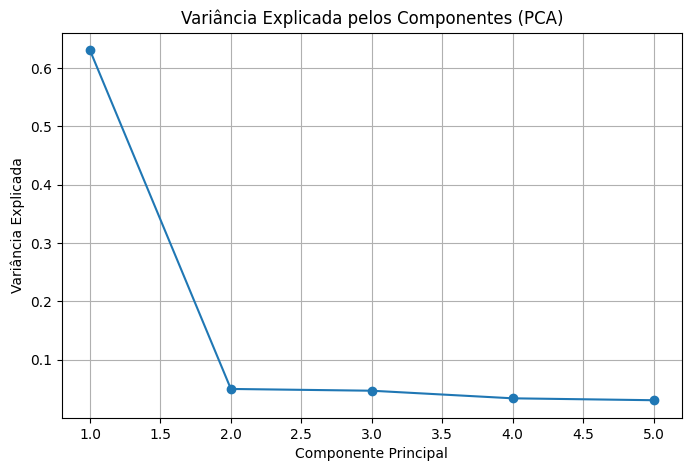

In [18]:
# Variância Explicada (Gráfico PCA)

plt.figure(figsize=(8,5))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker="o")
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada")
plt.title("Variância Explicada pelos Componentes (PCA)")
plt.grid()
plt.show()


In [19]:
# Dataset Final + Export

df_final = pd.concat([df_std, pca_df], axis=1)
df_final.to_csv("processed_data.csv", index=False)

df_final.head()
print("Shape final:", df_final.shape)

Shape final: (6344, 44)
